# [2022 Fall] Final Exam - Question 1

> Course: AP3021

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 颱風半徑和風速

In [2]:
radius, velocity = np.loadtxt("./data/TCVt.txt",unpack="true")

print(radius)
print(len(radius))
print(velocity)
print(len(velocity))

[  0.5   8.5  16.5  24.5  32.5  40.5  56.5  64.5  72.5  80.5  88.5  96.5
 104.5 112.5 120.5 128.5 136.5 144.5 152.5 160.5 168.5 176.5 184.5 192.5]
24
[ 2.0233  8.6362 12.1303 14.8529 17.1661 19.6514 19.2963 18.4415 17.6843
 17.0022 16.3786 15.8015 15.2619 14.7534 14.271  13.8111 13.3708 12.9481
 12.5413 12.1492 11.7707 11.4049 11.0513 10.7091]
24


### 畫個圖

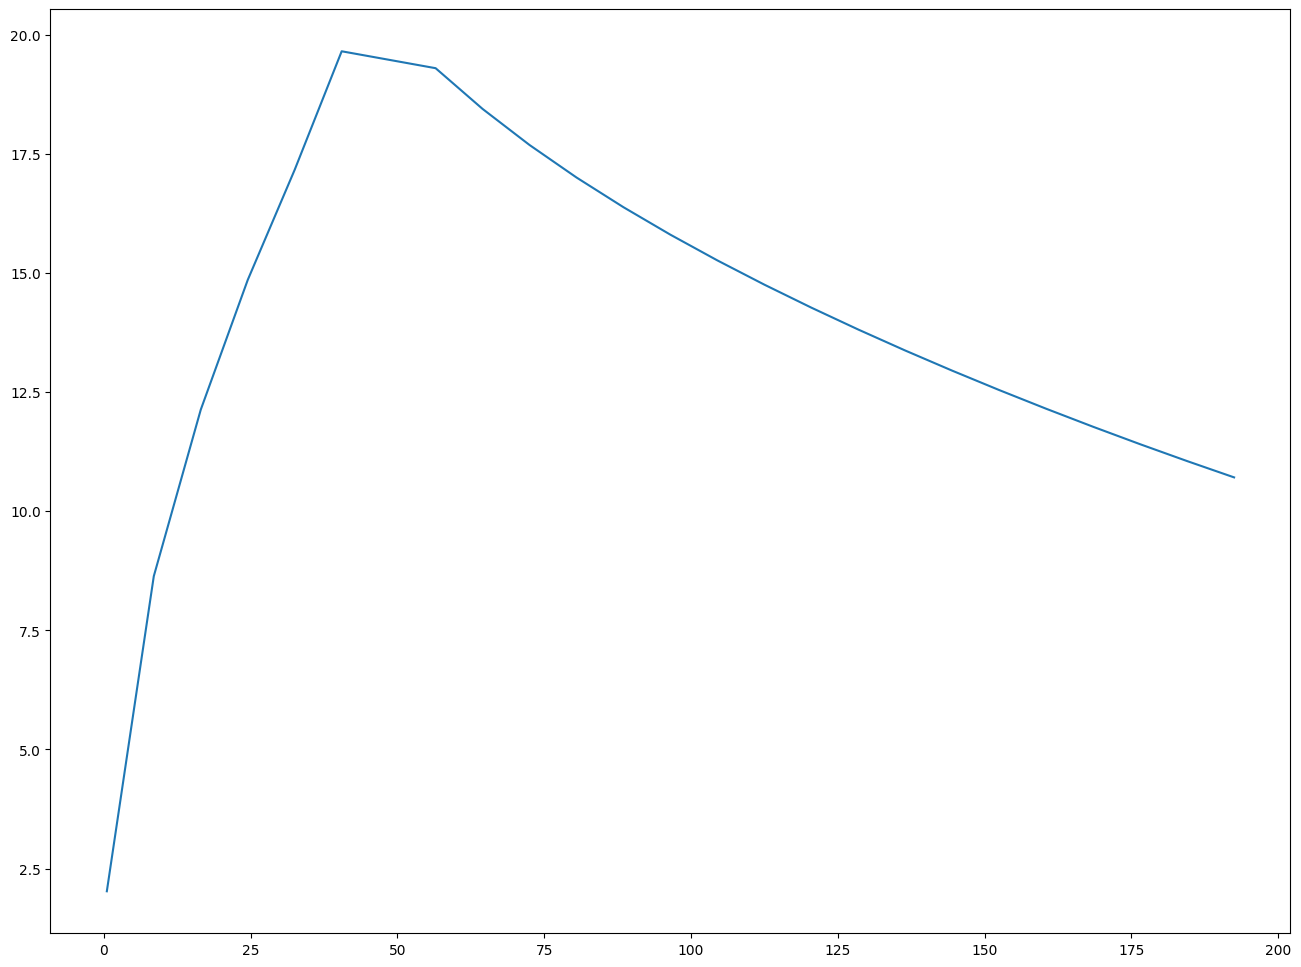

In [3]:
fig = plt.figure(figsize=(16,12))
plt.plot(radius, velocity)
plt.show()

### a. Determine Vt at 50km with the Lagrange method

In [4]:
def lagrange(x, y, f, n, x_miss):
    ans = 0.0
    for i in range(f, n+1):
        product = y[i]
        for j in range(f, n+1):
            if i != j:
                product = product * (x_miss - x[j]) / (x[i] - x[j])
        ans = ans + product
    return ans

In [5]:
ans = lagrange(radius, velocity, 0, len(radius)-1, 50.)
print("Vt at 50km with Lagrange method:", ans)

Vt at 50km with Lagrange method: 19.944063474958146


#### b. Please determine Vt at 50 km, by the cubi spline method

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def cubic_inter(x0, x, y):

    x = np.array(x)
    y = np.array(y)

    size = len(x)

    x_diff = np.zeros(size - 1)
    for i in range(0, 23):
        x_diff[i] = x[i + 1] - x[i]

    y_diff = np.zeros(size - 1)
    for i in range(0, 23):
        y_diff[i] = y[i + 1] - y[i]

    # allocate buffer matrices
    Li = np.zeros(size)
    Li_1 = np.zeros(size-1)
    z = np.zeros(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = np.sqrt(2*x_diff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = x_diff[i-1] / Li[i-1]
        Li[i] = np.sqrt(2*(x_diff[i-1]+x_diff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(y_diff[i]/x_diff[i] - y_diff[i-1]/x_diff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = x_diff[-1] / Li[i-1]
    Li[i] = np.sqrt(2*x_diff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    count = 0

    for i in range(0, len(x)):
        if x0[0] > x[i]:
            count += 1
        else:
            break

    xi1, xi0 = x[count], x[count - 1]
    yi1, yi0 = y[count], y[count - 1]
    zi1, zi0 = z[count], z[count - 1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 \
        + zi1/(6*hi1)*(x0-xi0)**3 \
        + (yi1/hi1 - zi1*hi1/6)*(x0-xi0) \
        + (yi0/hi1 - zi0*hi1/6)*(xi1-x0)

    return f0

In [7]:
print('Vt at 50 km by the Cubic spline =',cubic_inter([50], radius, velocity)[0])

Vt at 50 km by the Cubic spline = 20.117322677684125


### c. Determine the location of the maximum of the wind gradient based on (b).

In [8]:
def central_diff(radius_arr, wind_arr, data_size):

    # The first and the last need to be special progress.

    temp_grad_arr = []


    for i in range(0, data_size):

        if i == 0:
            pressure_div = float(radius_arr[i + 1] - radius_arr[i])
            temp_div = float(wind_arr[i + 1] - wind_arr[i])
            temp_grad =  temp_div / pressure_div
        elif i == data_size - 1:
            pressure_div = float(radius_arr[i] - radius_arr[i - 1])
            temp_div = float(wind_arr[i] - wind_arr[i - 1])
            temp_grad =  temp_div / pressure_div
        else:
            pressure_div = float(radius_arr[i + 1] - radius_arr[i - 1])
            temp_div = float(wind_arr[i + 1] - wind_arr[i - 1])
            temp_grad =  temp_div / pressure_div

        temp_grad_arr.append(temp_grad)

    return temp_grad_arr

In [9]:
radius_arr = np.linspace(0.5, 192.5, 8)
wind_arr = cubic_inter(radius_arr, radius, velocity)
data_size = len(radius_arr)
wing_grad_arr = central_diff(radius_arr, wind_arr, data_size)
wind_grad_max = max(wing_grad_arr)
print("The maximum of the wind gradient:", wind_grad_max)

The maximum of the wind gradient: 0.877404910990909


### d. Determine the maximum of the wind gradient with the central difference method

In [10]:
data_size = len(radius)
wing_grad_arr2 = central_diff(radius, velocity, data_size)
wind_grad_max2 = max(wing_grad_arr2)
print("The maximum of the wind gradient with the central difference method:", wind_grad_max2)

The maximum of the wind gradient with the central difference method: 0.8266125000000001
